
This lacks
1. Scaling/Normalizing the input features
2. Doesnt provide clarity on about the learning rate


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt

#here we just added export?format=csv
url = "https://docs.google.com/spreadsheets/d/1AjPzzXDMNZGZPxpxC5qyYsg1vc5f_JD0uPceMAsbfQo/export?format=csv"
df = pd.read_csv(url,index_col=0)


house_areas = np.array(df["House Area"].tolist())
no_of_rooms = np.array(df["Number of rooms"].tolist())
prices = np.array(df["Price"].tolist())

th0old = 0
th1old = 0
th2old = 0


expected_price = th0old + th1old * house_areas + th2old * no_of_rooms

j = np.square(np.std(expected_price - prices))

alhpa = 0.0001

for i in range(10):

  expected_price = th0old + th1old * house_areas + th2old * no_of_rooms



  th0new = th0old - 2* alhpa * np.mean(expected_price - prices)
  th1new = th1old - 2* alhpa * np.mean((expected_price - prices) * house_areas)
  th2new = th2old - 2* alhpa * np.mean((expected_price - prices) * no_of_rooms)


  th0old = th0new
  th1old = th1new
  th2old = th2new

j = np.square(np.std(expected_price - prices))

print(j)
print()
print(th0new)
print(th1new)
print(th2new)



pt.show()

df

# 242.74210181278468

# 5.90374525350348e-05
# 0.33284132631868685
# 0.0003720982690646301



1.6393459717935228e+73

-3.0832720238289495e+33
-1.7331778161760505e+37
-1.9260760673745976e+34


,House Area,Number of rooms,Price
House ID,,,
1,6274,8,2100
2,6689,5,2200
3,4276,8,1400
4,5130,9,1700
5,6035,6,2000
6,2946,1,1000
7,4727,10,1600
8,6873,7,2300
9,3911,4,1300


This is helps us understanding the cost function and learning rate dependence

0 1637500.0
500 197.942558077932
1000 118.54653159108312
1500 118.53973803644422
2000 118.53973671183724
2500 118.53973671146491
3000 118.53973671146622
3500 118.53973671146494
4000 118.53973671146531
4500 118.539736711465

Final cost J: 118.539736711465
th0: 1749.9999999999889
th1: 460.29866251168863
th2: 2.149341442673901


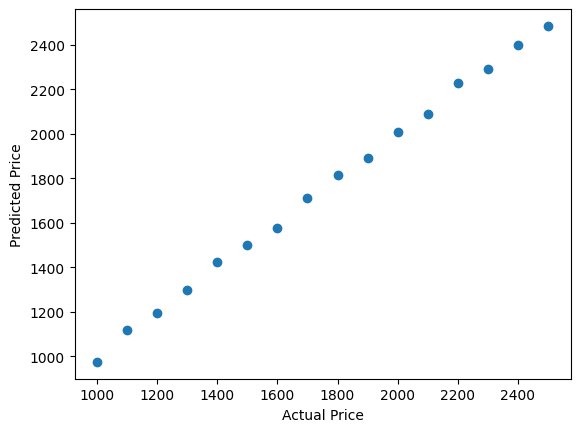

,House Area,Number of rooms,Price
House ID,,,
1,6274,8,2100
2,6689,5,2200
3,4276,8,1400
4,5130,9,1700
5,6035,6,2000
6,2946,1,1000
7,4727,10,1600
8,6873,7,2300
9,3911,4,1300


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt


url = "https://docs.google.com/spreadsheets/d/1AjPzzXDMNZGZPxpxC5qyYsg1vc5f_JD0uPceMAsbfQo/export?format=csv"
df = pd.read_csv(url, index_col=0)


house_areas = df["House Area"].to_numpy()
no_of_rooms = df["Number of rooms"].to_numpy()
prices      = df["Price"].to_numpy()

# Data Normalization
ha_mean, ha_std = house_areas.mean(), house_areas.std()
rm_mean, rm_std = no_of_rooms.mean(), no_of_rooms.std()

house_areas_s = (house_areas - ha_mean) / ha_std
no_of_rooms_s = (no_of_rooms - rm_mean) / rm_std


th0old = 0.0
th1old = 0.0
th2old = 0.0


alhpa = 0.01
iters = 5000


for i in range(iters):
    expected_price = th0old + th1old * house_areas_s + th2old * no_of_rooms_s
    err = expected_price - prices


    j = np.mean(err**2) / 2

    th0new = th0old - alhpa * np.mean(err)
    th1new = th1old - alhpa * np.mean(err * house_areas_s)
    th2new = th2old - alhpa * np.mean(err * no_of_rooms_s)

    th0old, th1old, th2old = th0new, th1new, th2new

    if i % 500 == 0:
        print(i, j)

print("\nFinal cost J:", j)
print("th0:", th0new)
print("th1:", th1new)
print("th2:", th2new)


pred = th0new + th1new * house_areas_s + th2new * no_of_rooms_s


pt.scatter(prices, pred)
pt.xlabel("Actual Price")
pt.ylabel("Predicted Price")
pt.show()

df


This is helps us understanding the cost function and learning rate dependence and also the use of standardization

Final MSE: 237.0794734229278
theta0: 1749.9999999999945
theta1: 460.29866251169017
theta2: 2.1493414426735535


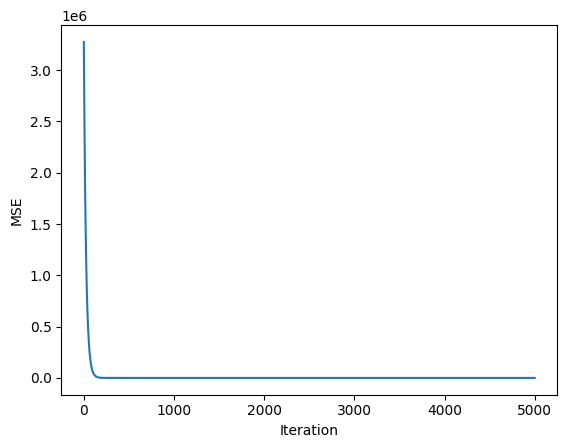

,House Area,Number of rooms,Price
House ID,,,
1,6274,8,2100
2,6689,5,2200
3,4276,8,1400
4,5130,9,1700
5,6035,6,2000
6,2946,1,1000
7,4727,10,1600
8,6873,7,2300
9,3911,4,1300


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt

url = "https://docs.google.com/spreadsheets/d/1AjPzzXDMNZGZPxpxC5qyYsg1vc5f_JD0uPceMAsbfQo/export?format=csv"
df = pd.read_csv(url, index_col=0)

house_areas = np.array(df["House Area"].tolist(), dtype=float)
no_of_rooms = np.array(df["Number of rooms"].tolist(), dtype=float)
prices = np.array(df["Price"].tolist(), dtype=float)

# Normalization
ha_mean, ha_std = house_areas.mean(), house_areas.std()
rm_mean, rm_std = no_of_rooms.mean(), no_of_rooms.std()
house_areas_s = (house_areas - ha_mean) / ha_std
no_of_rooms_s = (no_of_rooms - rm_mean) / rm_std


th0old = 0.0
th1old = 0.0
th2old = 0.0

alpha = 0.01
iters = 5000

cost_history = []

for i in range(iters):

    expected_price = th0old + th1old * house_areas_s + th2old * no_of_rooms_s


    j = np.mean((expected_price - prices) ** 2)
    cost_history.append(j)


    th0new = th0old - alpha * 2 * np.mean(expected_price - prices)
    th1new = th1old - alpha * 2 * np.mean((expected_price - prices) * house_areas_s)
    th2new = th2old - alpha * 2 * np.mean((expected_price - prices) * no_of_rooms_s)

    th0old, th1old, th2old = th0new, th1new, th2new

print("Final MSE:", cost_history[-1])
print("theta0:", th0old)
print("theta1:", th1old)
print("theta2:", th2old)

pt.plot(cost_history)
pt.xlabel("Iteration")
pt.ylabel("MSE")
pt.show()

df


Predictor


In [6]:
def predictor(area,room):
  area = (area - ha_mean) / ha_std
  room = (room - rm_mean) / rm_std
  excpected_price = th0old + th1old * area + th2old * room
  return excpected_price

print(predictor(3000,5))
print(predictor(10000,10))
print(predictor(3000,12))


996.1007633543438
3333.9667751384036
1002.3836671169387
